# Welcome to the Little Red Dot: Data analysis of international arrivals to Singapore (2000-2018)

# Executive Summary
Tourism is an important pillar of Singapore's economy and currently contributes around 4% of its GDP. The industry is highly dependent on the volume of international arrivals and tourist expenditures to perform well. This project aims to determine salient trends and factors driving international arrivals to Singapore by analysing relevant data from 2000-2018. We will perform data visualisation of and investigate general trends, as well as conduct regression analysis to identify significant factors influencing total international arrival numbers. These findings are then interpreted and translated into actionable insights to inform the strategies of relevant stakeholders. 

In recent years, China, Indonesia and India have emerged as the top contributors of international arrivals to Singapore, presenting opportunities for the tourism industry to capitalise on. The steady growth of visitors from these countries have contributed to a general increase in international arrivals between 2000-2018. However, certain years experienced falls due to adverse events, such as SARS (2003), the Global Financial Crisis (2009) and MH370 (2014). Finally, international arrival numbers seem to follow a cyclical pattern each year. International arrivals usually peak in July and plunge in September, before surging again in December. 

Our regression analyses confirm at least three statistically significant factors influencing the total number of international arrivals to Singapore. As total population and GDP per capita in a country rises, we expect to see an increase in international arrivals from them. Conversely, as a country gets further away from Singapore, international arrivals fall. Interestingly, we do not find a significant relationship between sharing a common language and international arrivals. 

Welcome to the Little Red Dot focused mainly on deriving insights using quantitative data and some secondary desk research. One area of extension could be to supplement the existing project with qualitative data, which could be collected through interviews. Such primary research could provide more specific motivations behind why foreigners to visit Singapore (or not). 

In [1]:
#Import required packages and settings

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import matplotlib.ticker as mtick
import seaborn as sns
import scipy.stats as stats

pd.options.display.float_format = '{:,.3f}'.format
sns.set(style='ticks') #Sets seaborn styling for all visualisations

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.filterwarnings("ignore") #Omits warnings from appearing  

%matplotlib inline 

# Introduction
Tourism is an important aspect of the Singapore economy. According to the World Travel and Tourism Council's (WTTC) _Country Economic Impact Analysis_ report, the direct contribution of the travel & tourism sector to Singapore's GDP was $17.7 billion. This represents about 4.1% of total GDP in 2017. Beyond its economic contributions, tourism also serves to reinforce Singapore's status as a vibrant global city, attracting talents and businesses to invest in. With tourism being a key pillar of Singapore's economy, it is crucial to understand the trends and factors influencing international arrivals to the country. Insights drawn from international arrivals data can inform various stakeholders (e.g. government, retailers, hotel managements) regarding their strategies to capitalise on emerging trends. 

# Problem scoping and methodology
Our analysis will focus on the trends of and factors influencing total international arrivals to Singapore between 2000-2018.

## General trends
We first examine the general trends in international arrivals to Singapore and pursue any interesting observations that surface. We set out to answer three questions: 

**1)** What is the **general trend** of international arrivals to Singapore? Are there specific reasons for a fall in certain years?

**2)** Where are the **bulk** of international arrivals **coming from**? How has that changed over time?

**3)** Are there **'cyclical effects'** on international arrivals each year? Do some months consistently see more arrivals than others? Why?

## Influential factors
The next part of our analysis investigates possible factors influencing international arrivals to Singapore through regression analysis (cross-sectional and fixed effects). The factors examined in this analysis are: 

**1)** What is the effect of **GDP per capita** on international arrivals? 

**2)** What is the effect of **total population** on international arrivals? 

**3)** Does having a **common language** encourage more people to visit Singapore? 

**4)** How does **distance** between Singapore and the guest country affect international arrival numbers? 

# 1. Data Import & Exploration
We import two data sets for our analysis. The first is international arrivals data from the Department of Statistics (Singapore). This tidy data contains the number of international arrivals from each country/region by year and month. 

The second is a previously cleaned and compiled dataset (see the 'Data Cleaning and Merging' notebook for more details) as the basis of our study. 

This section examines the structure of the merged data as well as some summary statistics. 

### For a detailed explanation of the data sets used, please refer to the 'Data Cleaning and Merging" notebook.

## 1.1 Import Data

In [2]:
#Import the international arrivals data from DOS (Singapore)
#Create a column 'year' which is in datetime format

df_sg_arrivals = pd.read_csv('sg_intl_arrivals.csv')
df_sg_arrivals['visitor_count']= pd.to_numeric(df_sg_arrivals['visitor_count'],errors='coerce')
df_sg_arrivals.head()

,month_year,region,country,visitor_count
0,2000-01,Southeast Asia,Brunei Darussalam,"4,138.000"
1,2000-01,Southeast Asia,Indonesia,"149,528.000"
2,2000-01,Southeast Asia,Malaysia,"41,261.000"
3,2000-01,Southeast Asia,Myanmar,"1,479.000"
4,2000-01,Southeast Asia,Philippines,"11,809.000"


In [3]:
#Import the merged data set

df_merged = pd.read_csv('df_merged.csv')
df_merged.head()

,Unnamed: 0,country,year,visitor_count,country_code,total_pop,gdp_per_capita,comm_lang,distw_km
0,0,Australia,2000,"510,347.000",AUS,"19,153,000.000","44,313.318",1,"5,893.497"
1,1,Australia,2001,"550,681.000",AUS,"19,413,000.000","44,564.977",1,"5,893.497"
2,2,Australia,2002,"538,378.000",AUS,"19,651,400.000","45,786.643",1,"5,893.497"
3,3,Australia,2003,"392,891.000",AUS,"19,895,400.000","46,575.415",1,"5,893.497"
4,4,Australia,2004,"561,219.000",AUS,"20,127,400.000","47,880.612",1,"5,893.497"


In [4]:
#Remove the Unnamed column from the dataframe

df_merged.drop('Unnamed: 0',axis=1,inplace=True)
df_merged.head(10)

,country,year,visitor_count,country_code,total_pop,gdp_per_capita,comm_lang,distw_km
0,Australia,2000,"510,347.000",AUS,"19,153,000.000","44,313.318",1,"5,893.497"
1,Australia,2001,"550,681.000",AUS,"19,413,000.000","44,564.977",1,"5,893.497"
2,Australia,2002,"538,378.000",AUS,"19,651,400.000","45,786.643",1,"5,893.497"
3,Australia,2003,"392,891.000",AUS,"19,895,400.000","46,575.415",1,"5,893.497"
4,Australia,2004,"561,219.000",AUS,"20,127,400.000","47,880.612",1,"5,893.497"
5,Australia,2005,"620,196.000",AUS,"20,394,800.000","48,760.355",1,"5,893.497"
6,Australia,2006,"691,632.000",AUS,"20,697,900.000","49,408.053",1,"5,893.497"
7,Australia,2007,"768,490.000",AUS,"20,827,600.000","50,955.056",1,"5,893.497"
8,Australia,2008,"833,156.000",AUS,"21,249,200.000","51,770.907",1,"5,893.497"
9,Australia,2009,"830,299.000",AUS,"21,691,700.000","51,689.914",1,"5,893.497"


The main dataset contains information such as the guest country, total visitors for a particular year, GDP per capita and total population. It also includes data such as whether the country shares an official language with Singapore, as well as a weighted distance between it and the Lion City. 

## 1.2 Exploring the data

In [5]:
#Obtain the number of rows and columns in the dataset 

df_merged.shape

(760, 8)

In [6]:
#Obtain information about the data type of each column and number of non-null entries

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 8 columns):
country           760 non-null object
year              760 non-null int64
visitor_count     760 non-null float64
country_code      760 non-null object
total_pop         760 non-null float64
gdp_per_capita    759 non-null float64
comm_lang         760 non-null int64
distw_km          760 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 47.6+ KB


There are 40 countries in the dataset, and 19 years of data for each, leading us to 760 data points in total. Oddly, Iran has missing GDP per capita for the year 2018, and that explains why for GDP per capita, we see 759 non-null objects instead of 760 as expected.

In [7]:
#List out the unique countries represented in the dataset 

df_merged.country.value_counts(dropna=False)

Norway                   19
Mauritius                19
Philippines              19
Australia                19
New Zealand              19
Netherlands              19
India                    19
United Arab Emirates     19
USA                      19
Bangladesh               19
Sweden                   19
China                    19
Malaysia                 19
Egypt                    19
Sri Lanka                19
Kuwait                   19
Myanmar                  19
Italy                    19
Pakistan                 19
Hong Kong SAR            19
Vietnam                  19
France                   19
Thailand                 19
Switzerland              19
Rep Of Ireland           19
South Africa (Rep Of)    19
Spain                    19
Saudi Arabia             19
Israel                   19
Germany                  19
Russian Federation       19
Denmark                  19
Canada                   19
South Korea              19
Iran                     19
Japan               

In [8]:
#Obtain summary statistics of the dataset

df_merged.describe() 

,year,visitor_count,total_pop,gdp_per_capita,comm_lang,distw_km
count,760.000,760.000,760.000,759.000,760.000,760.000
mean,"2,009.000","275,972.828","118,922,447.446","28,219.194",0.500,"6,845.159"
std,5.481,"487,706.838","273,207,324.289","23,130.819",0.500,"3,813.456"
min,"2,000.000",0.000,"333,241.000",346.775,0.000,505.538
25%,"2,004.000","21,198.500","7,338,400.750","4,744.012",0.000,"3,525.259"
50%,"2,009.000","73,217.000","46,624,019.500","31,439.924",0.500,"6,825.147"
75%,"2,014.000","379,403.750","83,672,660.000","45,604.297",1.000,"10,084.225"
max,"2,018.000","3,416,475.000","1,392,730,000.000","92,121.421",1.000,"15,122.620"


# 2. General Trends
In this section, we set out to answer three key questions: 

**1)** What is the general trend in international arrivals to Singapore? Are there specific reasons for a fall in certain years?

**2)** Where are the bulk of international arrivals coming from? How has that changed over time?

**3)** Are there 'cyclical effects' on international arrivals each year? Do some months consistently see more arrivals than others? Why?

## 2.1 Annual Arrivals (2000-2018)
We first plot the general trend in international arrivals to Singapore before digging deeper into anomalies that may surface. 

In [9]:
#Sum up the total number of visitors by year 

annual_arrivals = df_merged.groupby('year')['visitor_count'].sum()
annual_arrivals = annual_arrivals.reset_index()
annual_arrivals.head()

,year,visitor_count
0,2000,"7,017,207.000"
1,2001,"6,974,097.000"
2,2002,"7,043,621.000"
3,2003,"5,744,059.000"
4,2004,"7,826,528.000"


In [10]:
#Convert 'visitor_count' values to millions
#Convert 'year' to a str for plotting

annual_arrivals['visitors_millions'] = annual_arrivals['visitor_count'].apply(lambda x: x/1000000)
annual_arrivals['year'] = annual_arrivals['year'].astype(str)
annual_arrivals.head()

,year,visitor_count,visitors_millions
0,2000,"7,017,207.000",7.017
1,2001,"6,974,097.000",6.974
2,2002,"7,043,621.000",7.044
3,2003,"5,744,059.000",5.744
4,2004,"7,826,528.000",7.827


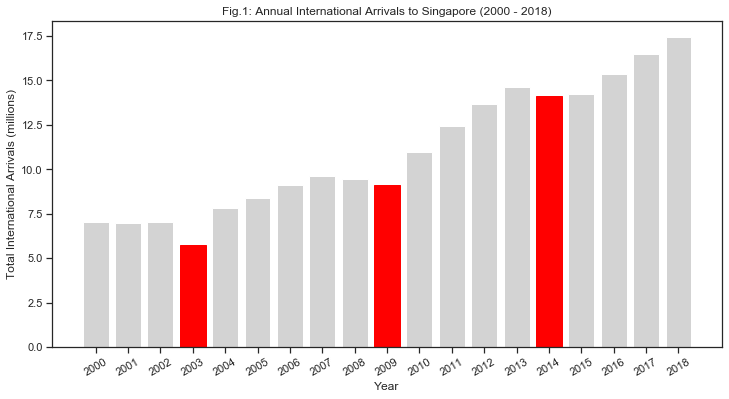

In [11]:
#Plot total international arrivals each year between 2000 and 2018
#Highlight '2003', '2009' and '2014' in red as data of interest in visualisation. 

plt.figure(figsize=(12,6)) #Set the size of the graph
annual = plt.bar('year', 'visitors_millions', data = annual_arrivals, color='lightgrey')
plt.xlabel('Year')
plt.xticks(rotation=30)
plt.ylabel('Total International Arrivals (millions)')
plt.title('Fig.1: Annual International Arrivals to Singapore (2000 - 2018)')
annual[3].set_color('red')
annual[9].set_color('red')
annual[14].set_color('red')

We observe that international arrivals to Singapore has generally increased between 2000 to 2018. However, there were certain years where this number fell (highlighted in red). We now attempt to understand and propose some explanations for these dips. 

### 2.1.1 Why did International Arrivals fall in 2003? 
International arrival numbers fell drastically in 2003, as reflected in the graph above. We hypothesise that this was due to the Severe Acute Respiratory Syndrome (SARS) epidemic which affected Singapore that year.  

To affirm this hypothesis, we will visualise the monthly arrivals to Singapore between 2001 and 2005. According to a report by The Straits Times, Patient No. 1 was admitted to the hospital in March 2003. The disease was eradicated from Singapore in July 2003. Hence, the time period between March 2003 to July 2003 may be anomalous compared to other years. 

In [12]:
#Slice out a dataframe with data of international arrivals from 2000-2006

df_sars = df_sg_arrivals.loc[df_sg_arrivals['month_year'] < '2006-01']
df_sars.tail()

,month_year,region,country,visitor_count
3667,2005-12,Oceania,Other Markets In Oceania,"1,184.000"
3668,2005-12,Africa,Egypt,nan
3669,2005-12,Africa,Mauritius,nan
3670,2005-12,Africa,South Africa (Rep Of),nan
3671,2005-12,Africa,Other Markets In Africa,nan


In [13]:
#Group by month & year and total up the number of international arrivals
#Split month_year column into a separate 'year' and 'month' column for easier visualisation
#Convert 'year' to numeric 

df_sars['visitor_count']= pd.to_numeric(df_sars['visitor_count'],errors='coerce')
df_sars = df_sars.groupby('month_year')['visitor_count'].sum()
df_sars = pd.DataFrame(df_sars)
df_sars = df_sars.reset_index()
df_sars['year'], df_sars['month'] = df_sars['month_year'].str.split('-', 1).str
df_sars['year'] = pd.to_numeric(df_sars['year'],errors='coerce')

df_sars.head()

,month_year,visitor_count,year,month
0,2000-01,"610,356.000",2000,01
1,2000-02,"578,176.000",2000,02
2,2000-03,"613,436.000",2000,03
3,2000-04,"610,106.000",2000,04
4,2000-05,"571,164.000",2000,05


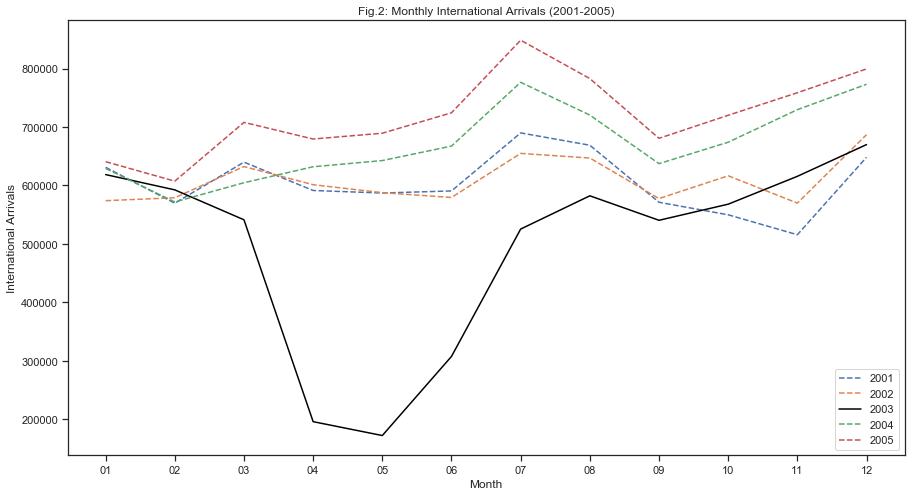

In [14]:
#Plot the monthly international arrivals for each year between 2001-2005

plt.figure(figsize=(15,8))

for i in range(2001,2006):
    if i == 2003:
        plt.plot('month','visitor_count',data=df_sars[df_sars['year'] == i],color='black',label=i)
    else:
        plt.plot('month','visitor_count',data=df_sars[df_sars['year'] == i],ls='--',label=i)

plt.xlabel('Month')
plt.ylabel('International Arrivals')
plt.title('Fig.2: Monthly International Arrivals (2001-2005)')
plt.legend(loc='lower right')

The effect of SARS on international arrivals to Singapore is clearly evidenced above. International arrivals plunged around March 2003 and only recovered around August 2003, coinciding with the period where SARS was prevalent. 

Health scares or epidemics can adversely impact tourism in Singapore. The country can mitigate such effects by ensuring our healthcare system is well-equipped to swiftly deal with health crises. Singapore's ability to eradicate SARS within a few months ensured arrival numbers recovered towards the end of 2003. 

### 2.1.2 Why did Arrivals fall in 2009 & 2014? 
International arrival numbers dipped in 2009 and 2014 as well. For these two cases, we hypothesise that they were due to economic events during those periods - the 2008 Global Financial Crisis and 2014 Eurozone Crisis. These economic crises likely reduced the disposable incomes of tourists and discouraged some from travelling to Singapore. 

To assess the merits of this hypothesis, we will plot the trend of international arrivals to Singapore and compare it with the trend of total GDP per capita over the same period. The total GDP per capita is calculated by summing up the (non-null) GDP per capita of the countries, divided by the sum of the total population in the df_merged data set for each year. This (to some extent) provides a gauge of the overall economic situation in the foreign countries captured in the data set. 

In [15]:
#Create a new data set from df_merged with non-null gdp_per_capita entries 

df_cleaned_gdp = df_merged[np.isfinite(df_merged['gdp_per_capita'])]
df_cleaned_gdp.head()

,country,year,visitor_count,country_code,total_pop,gdp_per_capita,comm_lang,distw_km
0,Australia,2000,"510,347.000",AUS,"19,153,000.000","44,313.318",1,"5,893.497"
1,Australia,2001,"550,681.000",AUS,"19,413,000.000","44,564.977",1,"5,893.497"
2,Australia,2002,"538,378.000",AUS,"19,651,400.000","45,786.643",1,"5,893.497"
3,Australia,2003,"392,891.000",AUS,"19,895,400.000","46,575.415",1,"5,893.497"
4,Australia,2004,"561,219.000",AUS,"20,127,400.000","47,880.612",1,"5,893.497"


In [16]:
#Sum up the number of international arrivals each year 
#Convert values in 'year' column to strings for easier visualisation 
#Convert the unit of measure of international arrivals to millions for easier interpretation 

df_arrival = df_cleaned_gdp.groupby('year')['visitor_count'].sum()
df_arrival = pd.DataFrame(df_arrival)
df_arrival = df_arrival.reset_index()
df_arrival['year'] = df_arrival['year'].astype(str)
df_arrival['visitor_million'] = df_arrival['visitor_count'].apply(lambda x: x/1000000)

In [17]:
#Sum up the total GDP in all countries each year, then divide by total population each year for per capita measure 
#Convert values in 'year' column to strings for easier visualisation 
#Convert the unit of measure of total GDP per capita to millions for easier interpretation

total_gdp = df_cleaned_gdp.total_pop * df_cleaned_gdp.gdp_per_capita
df_cleaned_gdp['Total_GDP'] = total_gdp
df_gdp = df_cleaned_gdp.groupby('year')['Total_GDP','total_pop'].sum()
df_gdp = pd.DataFrame(df_gdp)
df_gdp = df_gdp.reset_index()
df_gdp['year'] = df_gdp['year'].astype(str)
total_gdp_per_capita = df_gdp.Total_GDP / df_gdp.total_pop
df_gdp['gdp_per_capita_sum'] = total_gdp_per_capita
df_gdp['gdp_per_capita_million'] = df_gdp['gdp_per_capita_sum'].apply(lambda x: x/1000000)
df_gdp.head()

,year,Total_GDP,total_pop,gdp_per_capita_sum,gdp_per_capita_million
0,2000,"41,536,347,174,757.625","4,335,560,089.000","9,580.388",0.010
1,2001,"42,377,530,172,429.383","4,384,858,429.000","9,664.515",0.010
2,2002,"43,303,235,990,003.117","4,433,315,570.000","9,767.686",0.010
3,2003,"44,587,797,414,898.297","4,481,037,155.000","9,950.330",0.010
4,2004,"46,331,956,969,732.016","4,528,388,006.000","10,231.446",0.010


Text(0.5, 1.0, 'Fig.4: Total GDP per capita (selected countries)')

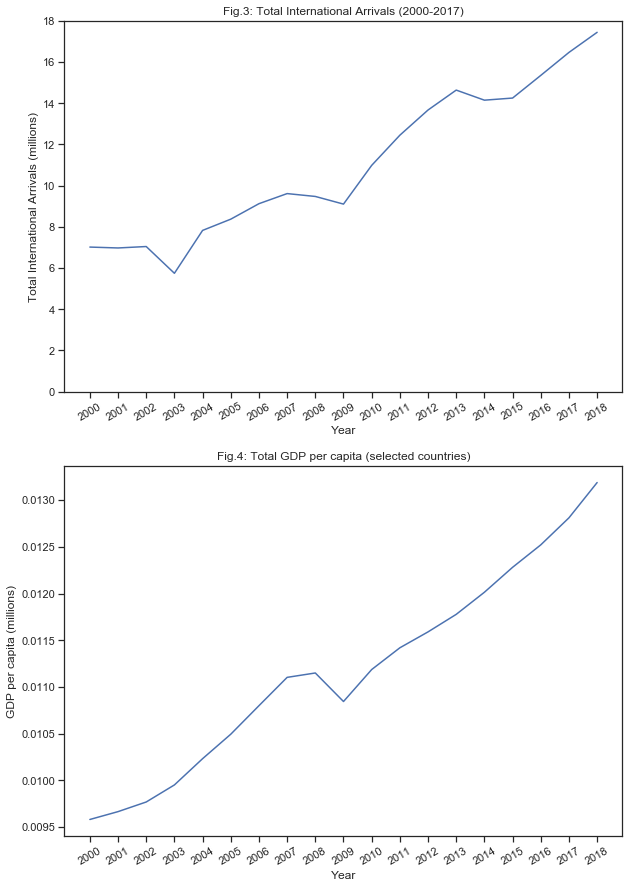

In [18]:
#Create a plot visualising total international arrivals from 2000 to 2018
#Create a plot visualising total GDP per capita (selected countries) from 2000 to 2018

plt.figure(figsize=(10,15))

plt.subplot(2,1,1)
plt1 = plt.plot('year','visitor_million',data=df_arrival)
plt.ylim(0,18)
plt.xticks(rotation=30)
plt.xlabel('Year')
plt.ylabel('Total International Arrivals (millions)')
plt.title('Fig.3: Total International Arrivals (2000-2017)')

plt.subplot(2,1,2)
plt2 = plt.plot('year','gdp_per_capita_million',data=df_gdp)
plt.xticks(rotation=30)
plt.xlabel('Year')
plt.ylabel('GDP per capita (millions)')
plt.title('Fig.4: Total GDP per capita (selected countries)')

From a cursory look, it appears there may be a slight correlation between guests' total GDP per capita and the number of international arrivals to Singapore. In particular, total GDP per capita of Singapore's guests fell sharply in 2009, and we see a corresponding (but much less pronounced) dip in total international arrivals. Thus, it makes intuitive sense that the 2009 fall in international arrivals could in part be attributed to the gloomy economic outlook at the time. 

However, the discernible fall in arrivals for 2014 seemed to occur during a time when total GDP per capita of guest countries was rising. In this case, it is difficult to assert that economic conditions precipitated by the 2014 Eurozone crisis was a key factor leading to the dip in international arrivals. Perhaps there are alternative factors which might better account for the decrease in international arrivals to Singapore in 2014. 

In later sections, we will construct a regression model and identify statistically significant factors influencing international arrivals to Singapore. 

## 2.2 Top Countries by Arrivals (2000-2018)
In this section, we begin by identifying the countries with the highest number of visitors to Singapore each year in 2000, 2006, 2012 and 2018. These years were chosen as they are evenly spaced out within the defined time period of the analysis. After identifying the countries which are consistently in the top 5 by total international arrivals to Singapore, we will trace their respective trends between 2000-2018.

We also examine and discuss any notable changes or patterns during our analysis. 

In [19]:
#Slice out dataframes corresponding to the years 2000, 2006, 2012 and 2018
#For each dataframe, we sum up the international arrivals from each country to obtain a total for the particular year

arrivals_2000 = df_sg_arrivals[np.logical_and(df_sg_arrivals['month_year'] >= '2000', df_sg_arrivals['month_year'] < '2001')]
country_arr_2000 = arrivals_2000.groupby('country')['visitor_count'].sum()
country_arr_2000 = country_arr_2000.reset_index()

arrivals_2006 = df_sg_arrivals[np.logical_and(df_sg_arrivals['month_year'] >= '2006', df_sg_arrivals['month_year'] < '2007')]
country_arr_2006 = arrivals_2006.groupby('country')['visitor_count'].sum()
country_arr_2006 = country_arr_2006.reset_index()

arrivals_2012 = df_sg_arrivals[np.logical_and(df_sg_arrivals['month_year'] >= '2012', df_sg_arrivals['month_year'] < '2013')]
country_arr_2012 = arrivals_2012.groupby('country')['visitor_count'].sum()
country_arr_2012 = country_arr_2012.reset_index()

arrivals_2018 = df_sg_arrivals[np.logical_and(df_sg_arrivals['month_year'] >= '2018', df_sg_arrivals['month_year'] < '2019')]
country_arr_2018 = arrivals_2018.groupby('country')['visitor_count'].sum()
country_arr_2018 = country_arr_2018.reset_index()

In [20]:
#We sort the countries by total international arrivals for each respective year in ascending order
#We then proceed to slice out the last 5 entries to obtain a data frame of the top 5 countries by international arrivals

top5_2000 = country_arr_2000.sort_values(['visitor_count'],ascending=True)
top5_2000['total_million'] = top5_2000['visitor_count'].apply(lambda x: x/1000000)
top5_2000 = top5_2000.tail() 

top5_2006 = country_arr_2006.sort_values(['visitor_count'],ascending=True)
top5_2006['total_million'] = top5_2006['visitor_count'].apply(lambda x: x/1000000)
top5_2006 = top5_2006.tail() 

top5_2012 = country_arr_2012.sort_values(['visitor_count'],ascending=True)
top5_2012['total_million'] = top5_2012['visitor_count'].apply(lambda x: x/1000000)
top5_2012 = top5_2012.tail()

top5_2018 = country_arr_2018.sort_values(['visitor_count'],ascending=True)
top5_2018['total_million'] = top5_2018['visitor_count'].apply(lambda x: x/1000000)
top5_2018 = top5_2018.tail()

Text(0.5, 1.0, 'Fig.8: Year 2018')

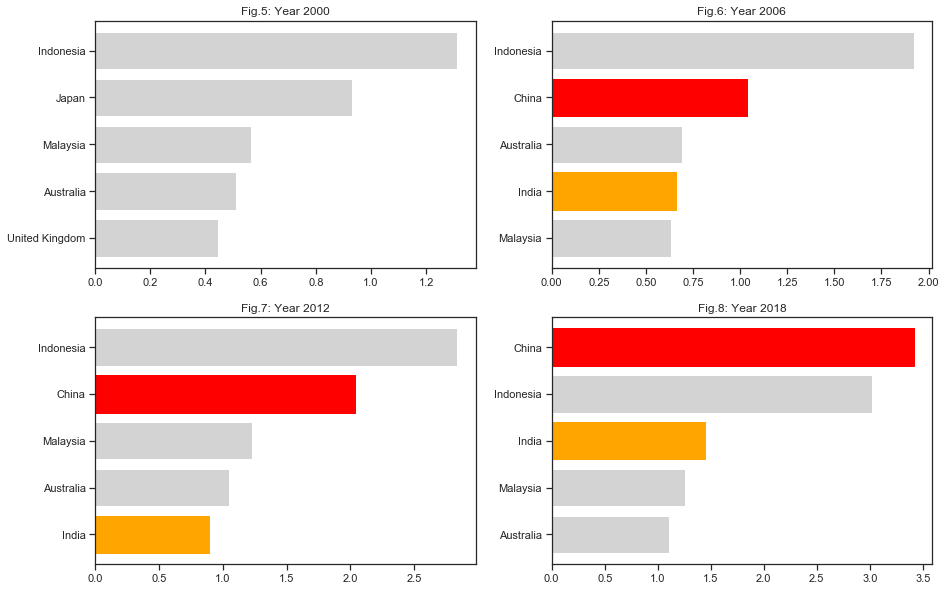

In [21]:
#We plot four snapshots of the top 5 countries by international arrivals to Singapore in 2000, 2006, 2012 and 2018
#China is colored red to highlight its growth in international arrivals and breaking into the top 5 
#India is colored in orange to highlight its growth in international arrivals and breaking into the top 5

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt1 = plt.barh('country','total_million',data=top5_2000,color='lightgrey')
plt.title('Fig.5: Year 2000')

plt.subplot(2,2,2) 
plt2 = plt.barh('country','total_million',data=top5_2006,color='lightgrey')
plt2[3].set_color('red')
plt2[1].set_color('orange')
plt.title('Fig.6: Year 2006')

plt.subplot(2,2,3)
plt3 = plt.barh('country','total_million',data=top5_2012,color='lightgrey')
plt3[3].set_color('red')
plt3[0].set_color('orange')
plt.title('Fig.7: Year 2012')

plt.subplot(2,2,4)
plt4 = plt.barh('country','total_million',data=top5_2018,color='lightgrey')
plt4[4].set_color('red')
plt4[2].set_color('orange')
plt.title('Fig.8: Year 2018')

From the snapshots, we observe that Malaysia, Indonesia and Australia have consistently been among the top 5 countries by total international arrivals to Singapore since 2000. More interestingly, China and India have broken into the top 5 between 2000 and 2018. The number of international arrivals from these countries have grown significantly to even overtake other countries, with India in third place and China in first (2018). 

### 2.2.1 International arrival trends of top 5 countries
This sub-section visualises the trends in international arrivals to Singapore from Malaysia, Indonesia, Australia, China and India over the period 2000-2018. 

In [22]:
#Slice out dataframes corresponding to the countries China, India, Malaysia, Indonesia and Australia
#Sum up the total number of international arrivals from each country each year 
#Convert units for international arrivals to millions for easier interpretation 
#Convert 'year' values to strings for easier visualisation 

df_china = df_merged[df_merged['country'] == 'China']
df_china = df_china.groupby('year')['visitor_count'].sum()
df_china = pd.DataFrame(df_china)
df_china['total_million'] = df_china['visitor_count'].apply(lambda x: x/1000000)
df_china = df_china.reset_index()
df_china['year'] = df_china['year'].astype(str)

df_india = df_merged[df_merged['country'] == 'India']
df_india = df_india.groupby('year')['visitor_count'].sum()
df_india = pd.DataFrame(df_india)
df_india['total_million'] = df_india['visitor_count'].apply(lambda x: x/1000000)
df_india = df_india.reset_index()
df_india['year'] = df_india['year'].astype(str)

df_malaysia = df_merged[df_merged['country'] == 'Malaysia']
df_malaysia = df_malaysia.groupby('year')['visitor_count'].sum()
df_malaysia = pd.DataFrame(df_malaysia)
df_malaysia['total_million'] = df_malaysia['visitor_count'].apply(lambda x: x/1000000)
df_malaysia = df_malaysia.reset_index()
df_malaysia['year'] = df_malaysia['year'].astype(str)

df_indonesia = df_merged[df_merged['country'] == 'Indonesia']
df_indonesia = df_indonesia.groupby('year')['visitor_count'].sum()
df_indonesia = pd.DataFrame(df_indonesia)
df_indonesia['total_million'] = df_indonesia['visitor_count'].apply(lambda x: x/1000000)
df_indonesia = df_indonesia.reset_index()
df_indonesia['year'] = df_indonesia['year'].astype(str)

df_australia = df_merged[df_merged['country'] == 'Australia']
df_australia = df_australia.groupby('year')['visitor_count'].sum()
df_australia = pd.DataFrame(df_australia)
df_australia['total_million'] = df_australia['visitor_count'].apply(lambda x: x/1000000)
df_australia = df_australia.reset_index()
df_australia['year'] = df_australia['year'].astype(str)

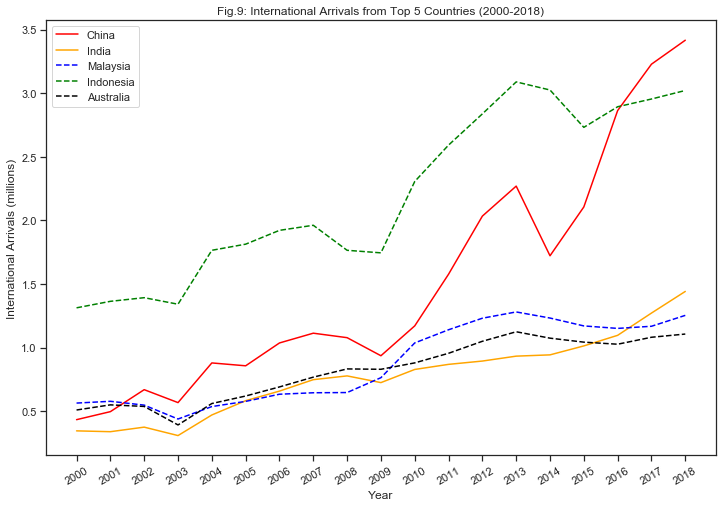

In [23]:
#Plot the trend of international arrivals from each country to Singapore between 2000-2017

plt.figure(figsize=(12,8))

plt.plot('year','total_million',data=df_china,color='red',label='China')
plt.plot('year','total_million',data=df_india,color='orange',label='India')
plt.plot('year','total_million',data=df_malaysia,color='blue',ls='--',label='Malaysia')
plt.plot('year','total_million',data=df_indonesia,color='green',ls='--',label='Indonesia')
plt.plot('year','total_million',data=df_australia,color='black',ls='--',label='Australia')
plt.xlabel('Year')
plt.ylabel('International Arrivals (millions)')
plt.title('Fig.9: International Arrivals from Top 5 Countries (2000-2018)')
plt.xticks(rotation = 30)
plt.legend(loc='top left')
plt.show()

We observe that the number of international arrivals from the top 5 countries have generally been on an upward trend from 2000 to 2018. Indonesia has been consistently contributing a substantially greater amount of visitors relative to other countries during the period. Another noteworthy trend is the steep rise in arrivals from China, especially after 2009 and 2014, even replacing Indonesia in 2016 as the largest source of visitors to Singapore. 

Various stakeholders can capitalise on these emerging trends to continue growing Singapore's tourism industry. Hotels can train their staff in Chinese etiquette and converse in Mandarin/Bahasa Indonesia to attend to their guests. 

The Singapore Tourism Board (STB) has also indicated that they will focus marketing efforts in China, India and Indonesia to attract more visitors. This strategy also serves to diversify the risk of over-relying on one country. 

Finally, retailers are also catching on with the surge in Chinese tourists. For example, Suntec City and Alipay cemented a partnership to launch Alipay touchpoints in the mall, enabling a seamless shopping experience for Chinese visitors. 

### Further exploration
There are several plausible reasons accounting for the majority of visitors originating from these countries. They include: (1) large population sizes, (2) rising affluence of the middle class, (3) geographical proximity and (4) cultural/linguistic similarities. 

We will construct a regression model to determine statistically significant factors influencing international arrivals to Singapore in a later section.

### 2.2.2 Mystery of 'the fall' in 2014 (partially) solved? 
Referring to Fig.9, we note a precipitous fall (around 0.5 million) in international arrivals from China in 2014. This sharp fall was not observed in the other four countries and warrants further investigation. This plunge likely contributed to the overall decrease in international arrivals to Singapore in 2014. 

According to an article by the Nikkei Asian Review, this fall could be linked to the MH370 aviation disaster, where a flight from Kuala Lumpur to Beijing disappeared. Many of the 239 passengers were Chinese nationals. This disaster may have scared Chinese tourists from visiting Southeast Asia temporarily. 

### Ascertaining the effect of MH370 on Chinese arrivals in 2014
To ascertain the effects of MH370, we will conduct an analysis similar to Section 2.1.1 (SARS epidemic). We will plot the trends of international arrivals from China between 2012 to 2016, and observe if there is an anomalous drop around the time MH370 occurred (March 2014). 

In [24]:
china_12_16 = df_sg_arrivals[df_sg_arrivals['country']=='China']
china_12_16 = china_12_16[np.logical_and(df_sg_arrivals['month_year'] >= '2012',df_sg_arrivals['month_year'] < '2017')]
china_12_16['year'], china_12_16['month'] = china_12_16['month_year'].str.split('-', 1).str
china_12_16['year'] = pd.to_numeric(china_12_16['year'],errors='coerce')

china_12_16.head()

,month_year,region,country,visitor_count,year,month
7352,2012-01,Greater China,China,"201,742.000",2012,01
7403,2012-02,Greater China,China,"158,002.000",2012,02
7454,2012-03,Greater China,China,"182,348.000",2012,03
7505,2012-04,Greater China,China,"173,543.000",2012,04
7556,2012-05,Greater China,China,"139,946.000",2012,05


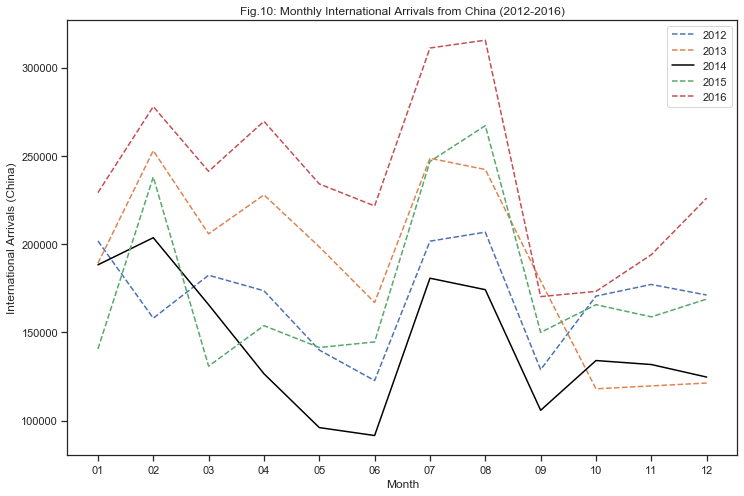

In [25]:
plt.figure(figsize=(12,8))

for i in range(2012,2017):
    if i == 2014:
        plt.plot('month','visitor_count',data=china_12_16[china_12_16['year'] == i],color='black',label=i)
    else:
        plt.plot('month','visitor_count',data=china_12_16[china_12_16['year'] == i],ls='--',label=i)

plt.xlabel('Month')
plt.ylabel('International Arrivals (China)')
plt.title('Fig.10: Monthly International Arrivals from China (2012-2016)')
plt.legend()

The effect of MH370 is rather conclusive from Fig.10. We see a sharp drop from Feb 2014 which lasted till June 2014. This coincided with the period when the disaster occurred and was still fresh in people's minds. Even though arrival numbers rebounded in July 2014, it was still below those of 2012. This could indicate that the events of MH370 probably still affected the Chinese's decision to travel to Singapore.

The tourism industry in Singapore can be highly volatile and vulnerable to many 'shocks'. These include health crises, poor economic outlook in foreign countries and aviation disasters. As such, STB's approach to diversify our sources of international arrivals may be prudent in order to mitigate adverse shocks.

## 2.3 Annual seasonal effects
The final sub-section tries to uncover annual 'patterns' in international arrivals to Singapore between 2000-2018. We hypothesise that there may be certain months of the year which see more tourists compared to others. we then go on to investigate possible reasons for any consistent patterns that are present across the years.  

NOTE: The year 2003 was omitted due to the SARS epidemic, which made it an anomalous year for international arrivals. 

In [26]:
df_seasonal = df_sg_arrivals.groupby('month_year')['visitor_count'].sum()
df_seasonal = df_seasonal.reset_index()
df_seasonal['year'], df_seasonal['month'] = df_seasonal['month_year'].str.split('-', 1).str
df_seasonal['year']=pd.to_numeric(df_seasonal['year'],errors='coerce')
df_seasonal['arrivals_millions'] = df_seasonal['visitor_count'].apply(lambda x: x/1000000)
df_seasonal.head()

,month_year,visitor_count,year,month,arrivals_millions
0,2000-01,"610,356.000",2000,01,0.610
1,2000-02,"578,176.000",2000,02,0.578
2,2000-03,"613,436.000",2000,03,0.613
3,2000-04,"610,106.000",2000,04,0.610
4,2000-05,"571,164.000",2000,05,0.571


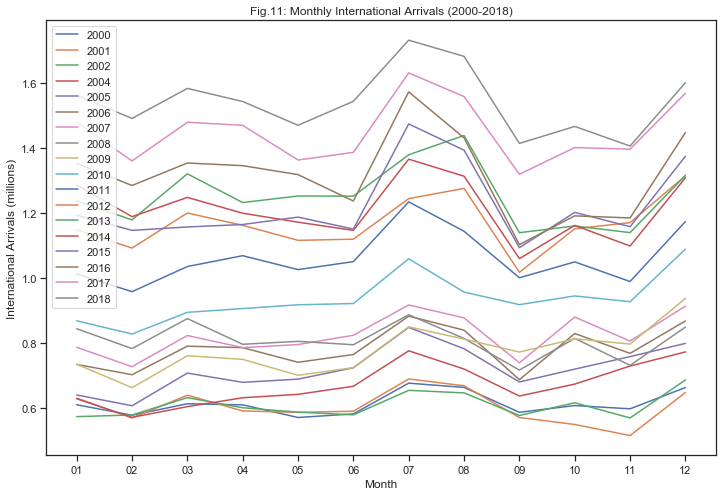

In [27]:
plt.figure(figsize=(12,8))

for i in range(2000,2019):
    if i != 2003:
        plt.plot('month','arrivals_millions',data=df_seasonal[df_seasonal['year'] ==i],label=i)

plt.xlabel('Month')
plt.ylabel('International Arrivals (millions)')
plt.title('Fig.11: Monthly International Arrivals (2000-2018)')
plt.legend()

Fig.11 reveals a few cyclical patterns in arrivals to Singapore each year between 2000-2018. (1) The number of visitors to Singapore usually peaks around July. (2) There seems to be a substantially smaller number of visitors in September every year. (3) International arrival numbers pick up and surge again in December. 

Preliminary desk research reveals many potential factors explaining some of the above observations. The peak in July may be due to the Great Singapore Sale and Singapore Food Festival occurring during that period. Additionally, July also coincides with the summer holidays in many parts of the world, thus contributing to a surge in (younger) tourists to Singapore. The other peak in December may be a result of winter travellers. Moreover, Zoukout, a massive weekend-long party may also be a huge draw for tourists.  

To supplement our understanding of these seasonal patterns, we could try to obtain demographic data of international travellers into Singapore, such as their age and employment status (e.g. students would be entitled to summer breaks rather than working adults). We could also conduct qualitative studies such as interviews to better investigate the reasons motivating foreigners to visit Singapore (or not) during specific months. 

# 3. Factors influencing international arrivals to Singapore
In the next segment of our study, we investigate possible factors influencing international arrivals to Singapore through regression analysis. The factors and questions addressed are: 

**1)** What is the effect of **GDP per capita** on international arrivals? 

**2)** What is the effect of **total population** on international arrivals? 

**3)** Does sharing a **common language** make Singapore a more viable destination to visit? 

**4)** How does **distance** between Singapore and the visiting country affect international arrival numbers? 

We first perform exploratory data analysis to identify additional steps needed before proceeding with the regression (e.g. cleaning, transformation). We proceed to conduct both a cross-sectional analysis for factors that are changing across countries (in 2018), and a fixed-effects analysis for factors that are changing across time.

## 3.1 Exploratory data analysis (EDA) 
We slice a specific data set to conduct our regression modelling. We remove rows which have null values in their visitor count and country code. 

In [28]:
#Slice a data set where visitor count is non-zero and has a country code (removing all null entries)
#Remove all entries in the year 2003 as it was an anomalous year due to SARS

df_merged1 = df_merged[np.logical_and(df_merged['visitor_count'] > 0, df_merged['country_code'] != 'None')]
df_model = df_merged1[df_merged1['year'] != 2003]
df_model = df_model.set_index('country_code')
df_model = df_model[np.isfinite(df_model['gdp_per_capita'])]
df_model.head(10)

,country,year,visitor_count,total_pop,gdp_per_capita,comm_lang,distw_km
country_code,,,,,,,
AUS,Australia,2000,"510,347.000","19,153,000.000","44,313.318",1,"5,893.497"
AUS,Australia,2001,"550,681.000","19,413,000.000","44,564.977",1,"5,893.497"
AUS,Australia,2002,"538,378.000","19,651,400.000","45,786.643",1,"5,893.497"
AUS,Australia,2004,"561,219.000","20,127,400.000","47,880.612",1,"5,893.497"
AUS,Australia,2005,"620,196.000","20,394,800.000","48,760.355",1,"5,893.497"
AUS,Australia,2006,"691,632.000","20,697,900.000","49,408.053",1,"5,893.497"
AUS,Australia,2007,"768,490.000","20,827,600.000","50,955.056",1,"5,893.497"
AUS,Australia,2008,"833,156.000","21,249,200.000","51,770.907",1,"5,893.497"
AUS,Australia,2009,"830,299.000","21,691,700.000","51,689.914",1,"5,893.497"


In [29]:
#Obtain summary information about the modelling data set 

df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, AUS to VNM
Data columns (total 7 columns):
country           623 non-null object
year              623 non-null int64
visitor_count     623 non-null float64
total_pop         623 non-null float64
gdp_per_capita    623 non-null float64
comm_lang         623 non-null int64
distw_km          623 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 38.9+ KB


The regression analysis data set has 623 data points with the country name, visitor count for a particular year, GDP per capita, total population, whether it shares a common language with and its distance from Singapore. 

Next, we visualise the distribution of the data through boxplots. 

Text(0.5, 1.0, 'Distribution of distance from Singapore by country (2000-2018)')

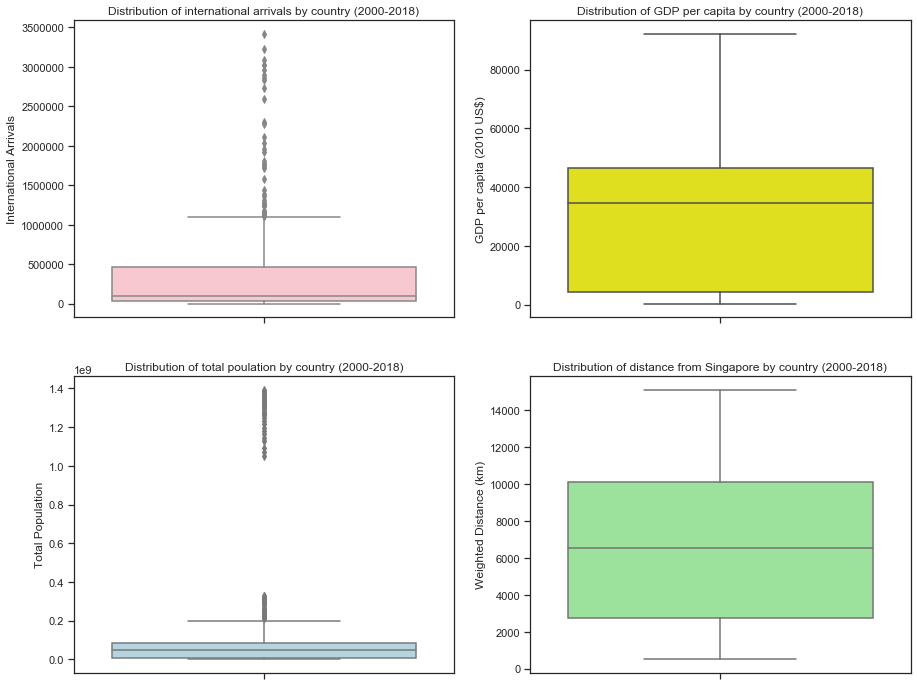

In [30]:
#Creating boxplots for the continuous variables in df_model to get a sense of their distribution and identify outliers

plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.boxplot(y='visitor_count',data=df_model,color='pink')
plt.ylabel('International Arrivals')
plt.title('Distribution of international arrivals by country (2000-2018)')

plt.subplot(2,2,2)
sns.boxplot(y='gdp_per_capita',data=df_model,color='yellow')
plt.ylabel('GDP per capita (2010 US$)')
plt.title('Distribution of GDP per capita by country (2000-2018)')

plt.subplot(2,2,3)
sns.boxplot(y='total_pop',data=df_model,color='lightblue')
plt.ylabel('Total Population')
plt.title('Distribution of total poulation by country (2000-2018)')

plt.subplot(2,2,4)
sns.boxplot(y='distw_km',data=df_model,color='lightgreen')
plt.ylabel('Weighted Distance (km)')
plt.title('Distribution of distance from Singapore by country (2000-2018)')

It becomes clear that the distribution of international arrivals and total population contain many outliers that can severely affect our analysis. The outliers in international arrivals are caused by China, Indonesia and India, each with over a million visitors in recent years. The outliers in total population are similarly due to these three countries, which have much larger populations compared to other countries in the data set. 

This highlights the need for additional steps to be taken before we can conduct further analysis. 

## 3.2 Cross-sectional analysis (2018) 
We begin with a cross-sectional analysis of the data in 2018. This allow us to analyse the effects of the four variables (above) on international arrival numbers to Singapore. 

In [40]:
#We slice out a data set containing only entries for 2018. 

df_2018 = df_model[df_model['year'] == 2018]
df_2018.head()

,country,year,visitor_count,total_pop,gdp_per_capita,comm_lang,distw_km
country_code,,,,,,,
AUS,Australia,2018,"1,107,215.000","24,992,369.000","56,919.374",1,"5,893.497"
BGD,Bangladesh,2018,"126,301.000","161,356,039.000","1,203.216",0,"2,874.279"
BRN,Brunei Darussalam,2018,"74,960.000","428,962.000","31,436.949",1,"1,264.269"
CAN,Canada,2018,"129,512.000","37,058,856.000","51,357.754",1,"14,394.100"
CHN,China,2018,"3,416,475.000","1,392,730,000.000","7,754.962",1,"4,097.429"


Text(0.5, 1.0, 'Distribution of Weighted Distance from Singapore (2018)')

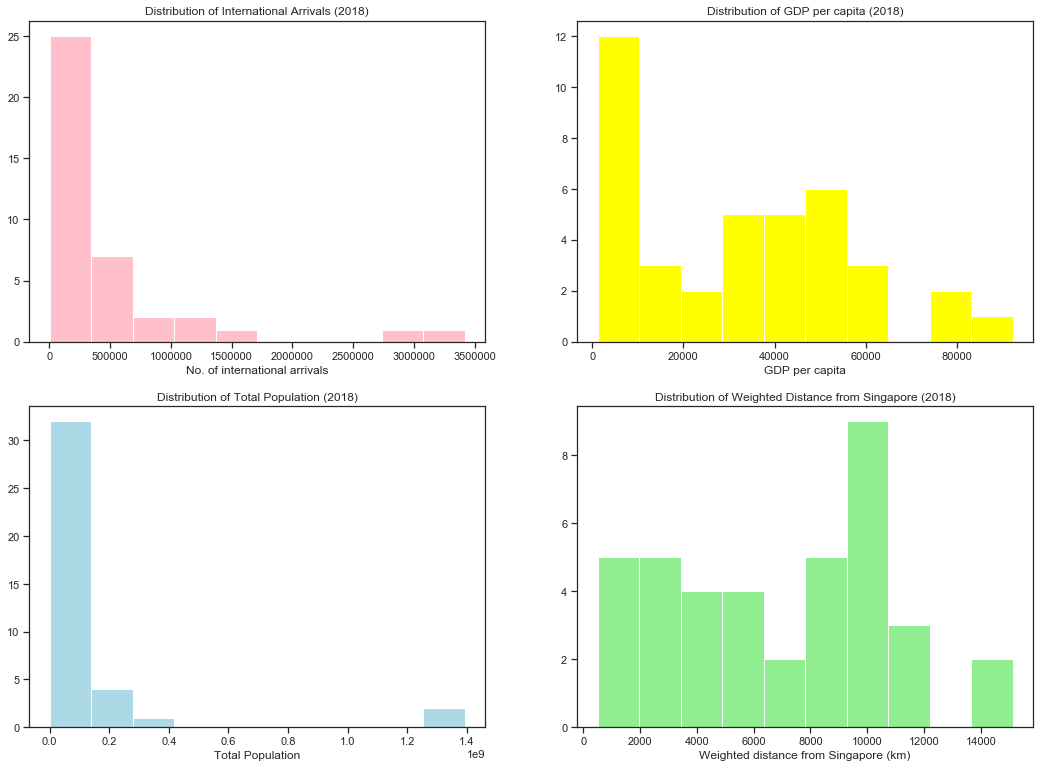

In [32]:
#Creating histograms for the continuous variables in df_2017 to get a sense of their distribution 
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.hist(x='visitor_count',data=df_2018,color='pink',bins=10)
plt.xlabel('No. of international arrivals')
plt.title('Distribution of International Arrivals (2018)')

plt.subplot(2,2,2)
plt.hist(x='gdp_per_capita',data=df_2018,color='yellow',bins=10)
plt.xlabel('GDP per capita')
plt.title('Distribution of GDP per capita (2018)')

plt.subplot(2,2,3)
plt.hist(x='total_pop',data=df_2018,color='lightblue',bins=10)
plt.xlabel('Total Population')
plt.title('Distribution of Total Population (2018)')

plt.subplot(2,2,4)
plt.hist(x='distw_km',data=df_2018,color='lightgreen',bins=10)
plt.xlabel('Weighted distance from Singapore (km)')
plt.title('Distribution of Weighted Distance from Singapore (2018)')

The distributions of international arrivals (pink) and total population (blue) have very large outliers. Their shapes are also very asymmetrical, which could pose problems to our regression model. Hence, we will perform a "natural log" transformation to change the shape of its distribution. 

We will also do a "natural log" transformation on GDP per capita to make the final regression results more logical.

Generally, regression models work better with more symmetrical distributions. Transforming certain variables should improve the eventual model we will construct. 

In [33]:
#Transform international arrivals and total population by taking the natural log of their values 

df_2018['log_visitor_count'] = np.log(df_2018['visitor_count'])
df_2018['log_total_pop'] = np.log(df_2018['total_pop'])
df_2018['log_gdp_per_capita'] = np.log(df_2018['gdp_per_capita'])

Text(0.5, 1.0, 'Distribution of weighted distance from Singapore (2018)')

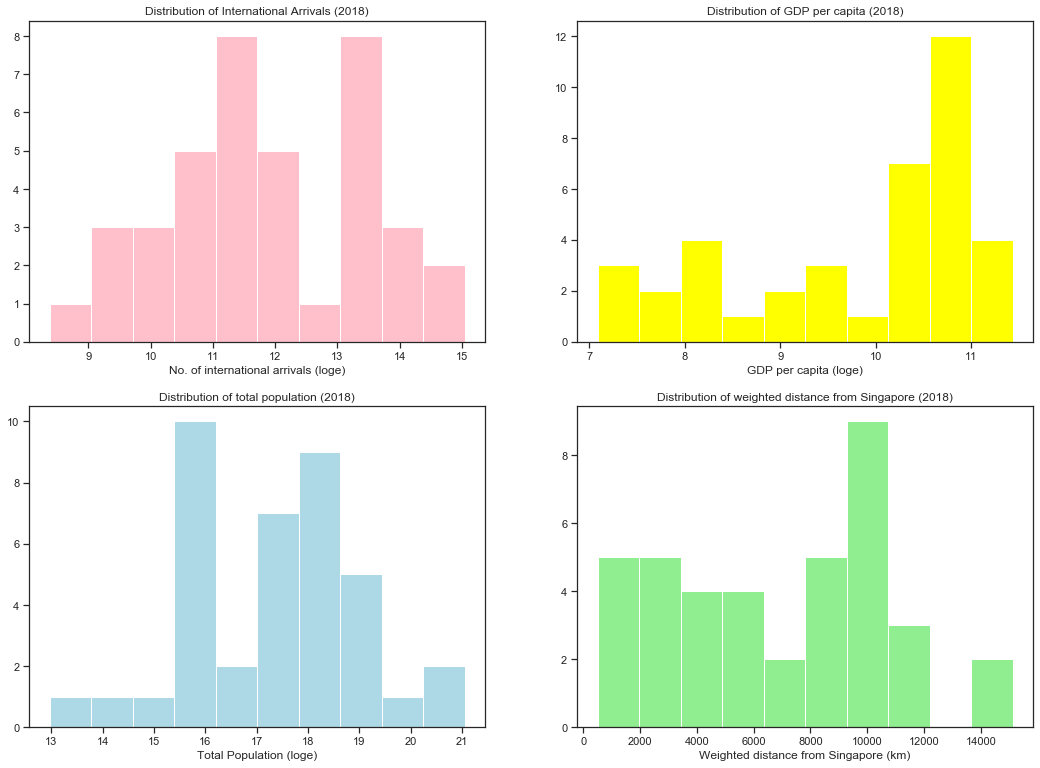

In [34]:
#Visualise the distribution of the variables after transformation 
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.hist(x='log_visitor_count',data=df_2018,color='pink',bins=10)
plt.xlabel('No. of international arrivals (loge)')
plt.title('Distribution of International Arrivals (2018)')

plt.subplot(2,2,2)
plt.hist(x='log_gdp_per_capita',data=df_2018,color='yellow',bins=10)
plt.xlabel('GDP per capita (loge)')
plt.title('Distribution of GDP per capita (2018)')

plt.subplot(2,2,3)
plt.hist(x='log_total_pop',data=df_2018,color='lightblue',bins=10)
plt.xlabel('Total Population (loge)')
plt.title('Distribution of total population (2018)')

plt.subplot(2,2,4)
plt.hist(x='distw_km',data=df_2018,color='lightgreen',bins=10)
plt.xlabel('Weighted distance from Singapore (km)')
plt.title('Distribution of weighted distance from Singapore (2018)')

In [35]:
df_2018.head()

,country,year,visitor_count,total_pop,gdp_per_capita,comm_lang,distw_km,log_visitor_count,log_total_pop,log_gdp_per_capita
country_code,,,,,,,,,,
AUS,Australia,2018,"1,107,215.000","24,992,369.000","56,919.374",1,"5,893.497",13.917,17.034,10.949
BGD,Bangladesh,2018,"126,301.000","161,356,039.000","1,203.216",0,"2,874.279",11.746,18.899,7.093
BRN,Brunei Darussalam,2018,"74,960.000","428,962.000","31,436.949",1,"1,264.269",11.225,12.969,10.356
CAN,Canada,2018,"129,512.000","37,058,856.000","51,357.754",1,"14,394.100",11.772,17.428,10.847
CHN,China,2018,"3,416,475.000","1,392,730,000.000","7,754.962",1,"4,097.429",15.044,21.055,8.956


Transforming the international arrivals and total population variables through "natural log" improved the shape of their distributions and reduced the effect of outliers. With the transformed data set, we can begin our cross-sectional analysis of international arrivals to Singapore in 2018. 

# NOTICE: Regression Analysis done in separate R notebook
At this point, we will switch to R to perform our regression analysis, as it has the relevants tools required. Please refer to the notebook titled "[3] Regression Analysis & Conclusion.ipynb" in the same folder for the regression models. 

In [36]:
#Export 2017 International Arrivals dataset for regression analysis in R

df_2018.to_csv('df_2018_model.csv')

In [37]:
#Export the main modelling data set out for regression analysis in R as well 

df_model.to_csv('df_model_main.csv')